### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from random import randint as ri

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Datasets

In [2]:
data1 = pd.read_csv("project3_dataset1.txt",sep="\t", header=None)
data2 = pd.read_csv("project3_dataset2.txt",sep="\t", header=None)

In [3]:
def one_hot(row):
    return int(row[4]=='Present')
data2[4] = data2.apply(lambda row:one_hot(row), axis=1)
data2

0     1      2      3  4   5      6      7   8  9
0    132  6.20   6.47  36.21  1  62  30.77  14.14  45  0
1    123  0.05   4.61  13.69  0  51  23.23   2.78  16  0
2    128  0.50   3.70  12.81  1  66  21.25  22.73  28  0
3    114  9.60   2.51  29.18  0  49  25.67  40.63  46  0
4    150  0.30   6.38  33.99  1  62  24.64   0.00  50  0
..   ...   ...    ...    ... ..  ..    ...    ...  .. ..
457  114  4.08   4.59  14.60  1  62  23.11   6.72  58  1
458  136  2.80   2.53   9.28  1  61  20.70   4.55  25  0
459  138  4.50   2.85  30.11  0  55  24.78  24.89  56  1
460  170  7.60   5.50  37.83  1  42  37.41   6.17  54  1
461  128  0.00  10.58  31.81  1  46  28.41  14.66  48  0

[462 rows x 10 columns]

In [4]:
print(data1.shape)
print(data2.shape)

(569, 31)
(462, 10)


### KNN

In [5]:
def Knn(X_train, X_test, y_train, y_test, n_neighbors, distance = "euclidean"):
    clf = KNeighborsClassifier(n_neighbors, metric = distance)
    clf.fit(X_train, y_train)

    pred_test = clf.predict(X_test)

    accr = accuracy_score(y_test, pred_test)
    precision = precision_score(y_test, pred_test)
    recall = recall_score(y_test, pred_test)
    f1 = f1_score(y_test, pred_test)
    roc = roc_auc_score(y_test, pred_test, average='weighted')
    return accr, precision, recall, f1, roc

def Validation_Knn(X, y, n_neighbors, distance = "euclidean"):
    
    kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

    ct = 0

    fold_results = []

    for train_index, test_index in kf.split(X, y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        accr, precision, recall, f1, roc = Knn(X_train, X_test, y_train, y_test, n_neighbors, distance)
        print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")

        fold_results.append([accr, precision, recall, f1, roc])

        ct+=1
    fold_results = np.array(fold_results)
    fold_results = np.sum(fold_results, axis=0)/ct
    return fold_results

def get_data(d1):
    X = d1[[i for i in range(d1.shape[1]-1)]].to_numpy()
    y = d1[[ d1.shape[1]-1 ]].to_numpy()
    
    c = Counter(y.ravel())
    print(f"Distribution: {c}")
    
    y = y.ravel()
    print(f"X.shape, y.shape = {X.shape}, {y.shape}")
    mms = MinMaxScaler()
    X = mms.fit_transform(X)
    return X, y

### Computing training accuracy for different K Values - Dataset 1

In [6]:
X, y = get_data(data1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

k_vals = [1,3,5,7,9]
d1_train_acc = []

for k in k_vals:
    met = Validation_Knn(X_train, y_train, k)
    print(f"Accuracy = {met[0]:.3f}, precision = {met[1]:.3f}, recall = {met[2]:.3f}, f1 = {met[3]:.3f}, AUC = {met[4]:.3f}")
    d1_train_acc.append(round(met[0], 2))

print("\nK values:", k_vals)
print("Train Accuracy:", d1_train_acc)


Distribution: Counter({0: 357, 1: 212})
X.shape, y.shape = (569, 30), (569,)
Fold: 0. Accuracy = 0.913, precision = 0.882, recall = 0.882, f1 = 0.882, AUC = 0.907
Fold: 1. Accuracy = 0.913, precision = 0.842, recall = 0.941, f1 = 0.889, AUC = 0.919
Fold: 2. Accuracy = 0.978, precision = 1.000, recall = 0.941, f1 = 0.970, AUC = 0.971
Fold: 3. Accuracy = 0.957, precision = 0.941, recall = 0.941, f1 = 0.941, AUC = 0.953
Fold: 4. Accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000, AUC = 1.000
Fold: 5. Accuracy = 0.911, precision = 0.882, recall = 0.882, f1 = 0.882, AUC = 0.905
Fold: 6. Accuracy = 0.956, precision = 0.941, recall = 0.941, f1 = 0.941, AUC = 0.953
Fold: 7. Accuracy = 0.978, precision = 1.000, recall = 0.941, f1 = 0.970, AUC = 0.971
Fold: 8. Accuracy = 0.956, precision = 0.941, recall = 0.941, f1 = 0.941, AUC = 0.953
Fold: 9. Accuracy = 0.978, precision = 0.941, recall = 1.000, f1 = 0.970, AUC = 0.983
Accuracy = 0.954, precision = 0.937, recall = 0.941, f1 = 0.939

### Training Vs Testing Accuracies

K = 1: Accuracy = 0.947, precision = 0.911, recall = 0.953, f1 = 0.932, AUC = 0.949
K = 3: Accuracy = 0.965, precision = 1.000, recall = 0.907, f1 = 0.951, AUC = 0.953
K = 5: Accuracy = 0.956, precision = 0.952, recall = 0.930, f1 = 0.941, AUC = 0.951
K = 7: Accuracy = 0.965, precision = 0.976, recall = 0.930, f1 = 0.952, AUC = 0.958
K = 9: Accuracy = 0.965, precision = 0.976, recall = 0.930, f1 = 0.952, AUC = 0.958

K values: [1, 3, 5, 7, 9]
Test Accuracy: [0.95, 0.96, 0.96, 0.96, 0.96]


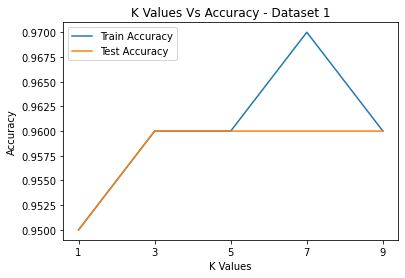

In [7]:
d1_test_acc = []

for k in k_vals:
    accr, precision, recall, f1, roc = Knn(X_train, X_test, y_train, y_test, k)
    print(f"K = {k}: Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    d1_test_acc.append(round(accr, 2))

print("\nK values:", k_vals)
print("Test Accuracy:", d1_test_acc)

plt.plot(k_vals, d1_train_acc, label ='Train Accuracy')
plt.plot(k_vals, d1_test_acc, label ='Test Accuracy')

plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.xticks(k_vals)
plt.legend()
plt.title('K Values Vs Accuracy - Dataset 1')
plt.show()


### Computing training accuracy for different distance metrics - Dataset 1 

In [8]:
X, y = get_data(data1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

distance_metrics = ["euclidean", "manhattan", "minkowski","cosine", "jaccard", "hamming"]
d1_train_acc = []

for distance in distance_metrics:
    met = Validation_Knn(X_train, y_train, 5, distance)
    print(f"Accuracy = {met[0]:.3f}, precision = {met[1]:.3f}, recall = {met[2]:.3f}, f1 = {met[3]:.3f}, AUC = {met[4]:.3f}")
    d1_train_acc.append(round(met[0], 2))
    

print("\Distance Metric", distance_metrics)
print("Train Accuracy:", d1_train_acc)


Distribution: Counter({0: 357, 1: 212})
X.shape, y.shape = (569, 30), (569,)
Fold: 0. Accuracy = 0.913, precision = 1.000, recall = 0.765, f1 = 0.867, AUC = 0.882
Fold: 1. Accuracy = 0.978, precision = 1.000, recall = 0.941, f1 = 0.970, AUC = 0.971
Fold: 2. Accuracy = 0.978, precision = 1.000, recall = 0.941, f1 = 0.970, AUC = 0.971
Fold: 3. Accuracy = 0.935, precision = 0.938, recall = 0.882, f1 = 0.909, AUC = 0.924
Fold: 4. Accuracy = 0.978, precision = 1.000, recall = 0.938, f1 = 0.968, AUC = 0.969
Fold: 5. Accuracy = 0.978, precision = 0.941, recall = 1.000, f1 = 0.970, AUC = 0.983
Fold: 6. Accuracy = 0.978, precision = 0.941, recall = 1.000, f1 = 0.970, AUC = 0.983
Fold: 7. Accuracy = 0.956, precision = 1.000, recall = 0.875, f1 = 0.933, AUC = 0.938
Fold: 8. Accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000, AUC = 1.000
Fold: 9. Accuracy = 0.956, precision = 1.000, recall = 0.875, f1 = 0.933, AUC = 0.938
Accuracy = 0.965, precision = 0.982, recall = 0.922, f1 = 0.949

/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classif

### Training Vs Testing Accuracies

K = 5, Metric = manhattan: Accuracy = 0.965, precision = 0.978, recall = 0.938, f1 = 0.957, AUC = 0.961
K = 5, Metric = manhattan: Accuracy = 0.965, precision = 0.978, recall = 0.938, f1 = 0.957, AUC = 0.961
K = 5, Metric = manhattan: Accuracy = 0.965, precision = 0.978, recall = 0.938, f1 = 0.957, AUC = 0.961
K = 5, Metric = manhattan: Accuracy = 0.930, precision = 0.917, recall = 0.917, f1 = 0.917, AUC = 0.928
K = 5, Metric = manhattan: Accuracy = 0.579, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.500
K = 5, Metric = manhattan: Accuracy = 0.702, precision = 0.792, recall = 0.396, f1 = 0.528, AUC = 0.660

Distance Metric: ['euclidean', 'manhattan', 'minkowski', 'cosine', 'jaccard', 'hamming']
Test Accuracy: [0.96, 0.96, 0.96, 0.93, 0.58, 0.7]


/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/naksh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


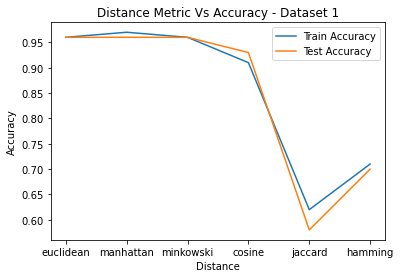

In [9]:
d1_test_acc = []

for distance in distance_metrics:
    accr, precision, recall, f1, roc = Knn(X_train, X_test, y_train, y_test, 5, distance)
    print(f"K = 5, Metric = manhattan: Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    d1_test_acc.append(round(accr, 2))
    
print("\nDistance Metric:", distance_metrics)
print("Test Accuracy:", d1_test_acc)

plt.plot(distance_metrics, d1_train_acc, label ='Train Accuracy')
plt.plot(distance_metrics, d1_test_acc, label ='Test Accuracy')

plt.xlabel("Distance")
plt.ylabel("Accuracy")
#plt.xticks(distance_metrics)
plt.legend()
plt.title('Distance Metric Vs Accuracy - Dataset 1')
plt.show()


### Computing training accuracy for different K Values - Dataset 2

In [10]:
X, y = get_data(data2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

d2_train_acc = []

for k in k_vals:
    met = Validation_Knn(X_train, y_train, k)
    print(f"Accuracy = {met[0]:.3f}, precision = {met[1]:.3f}, recall = {met[2]:.3f}, f1 = {met[3]:.3f}, AUC = {met[4]:.3f}")
    d2_train_acc.append(round(met[0], 2))
    
    
print("\nK values:", k_vals)
print("Train Accuracy:", d2_train_acc)


Distribution: Counter({0: 302, 1: 160})
X.shape, y.shape = (462, 9), (462,)
Fold: 0. Accuracy = 0.649, precision = 0.500, recall = 0.462, f1 = 0.480, AUC = 0.606
Fold: 1. Accuracy = 0.730, precision = 0.615, recall = 0.615, f1 = 0.615, AUC = 0.704
Fold: 2. Accuracy = 0.649, precision = 0.500, recall = 0.538, f1 = 0.519, AUC = 0.623
Fold: 3. Accuracy = 0.730, precision = 0.636, recall = 0.538, f1 = 0.583, AUC = 0.686
Fold: 4. Accuracy = 0.486, precision = 0.250, recall = 0.231, f1 = 0.240, AUC = 0.428
Fold: 5. Accuracy = 0.622, precision = 0.462, recall = 0.462, f1 = 0.462, AUC = 0.585
Fold: 6. Accuracy = 0.730, precision = 0.600, recall = 0.692, f1 = 0.643, AUC = 0.721
Fold: 7. Accuracy = 0.622, precision = 0.455, recall = 0.385, f1 = 0.417, AUC = 0.567
Fold: 8. Accuracy = 0.595, precision = 0.429, recall = 0.462, f1 = 0.444, AUC = 0.564
Fold: 9. Accuracy = 0.722, precision = 0.600, recall = 0.500, f1 = 0.545, AUC = 0.667
Accuracy = 0.653, precision = 0.505, recall = 0.488, f1 = 0.495,

### Training Vs Testing Accuracies

In [11]:
d2_test_acc = []

for k in k_vals:
    accr, precision, recall, f1, roc = Knn(X_train, X_test, y_train, y_test, k)
    print(f"K = {k}: Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    d2_test_acc.append(round(accr, 2))
    
print("\nK values:", k_vals)
print("Test Accuracy:", d2_test_acc)

plt.plot(k_vals, d2_train_acc, label ='Train Accuracy')
plt.plot(k_vals, d2_test_acc, label ='Test Accuracy')

plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.xticks(k_vals)
plt.legend()
plt.title('K Values Vs Accuracy - Dataset 2')
plt.show()

K = 1: Accuracy = 0.613, precision = 0.407, recall = 0.355, f1 = 0.379, AUC = 0.548
K = 3: Accuracy = 0.624, precision = 0.400, recall = 0.258, f1 = 0.314, AUC = 0.532
K = 5: Accuracy = 0.634, precision = 0.421, recall = 0.258, f1 = 0.320, AUC = 0.540
K = 7: Accuracy = 0.645, precision = 0.455, recall = 0.323, f1 = 0.377, AUC = 0.565
K = 9: Accuracy = 0.656, precision = 0.478, recall = 0.355, f1 = 0.407, AUC = 0.581

K values: [1, 3, 5, 7, 9]
Test Accuracy: [0.61, 0.62, 0.63, 0.65, 0.66]


### Computing training accuracy for different distance metrics - Dataset 2

In [12]:
X, y = get_data(data2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

d2_train_acc = []

for distance in ["euclidean", "manhattan", "minkowski","cosine", "jaccard", "hamming"]:
    met = Validation_Knn(X_train, y_train, 7, distance)
    print(f"Accuracy = {met[0]:.3f}, precision = {met[1]:.3f}, recall = {met[2]:.3f}, f1 = {met[3]:.3f}, AUC = {met[4]:.3f}")
    d2_train_acc.append(round(met[0], 2))
    
print("\nDistance Metric", distance_metrics)
print("Train Accuracy:", d2_train_acc)


Distribution: Counter({0: 302, 1: 160})
X.shape, y.shape = (462, 9), (462,)
Fold: 0. Accuracy = 0.595, precision = 0.375, recall = 0.231, f1 = 0.286, AUC = 0.511
Fold: 1. Accuracy = 0.595, precision = 0.400, recall = 0.308, f1 = 0.348, AUC = 0.529
Fold: 2. Accuracy = 0.676, precision = 0.571, recall = 0.308, f1 = 0.400, AUC = 0.591
Fold: 3. Accuracy = 0.595, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.458
Fold: 4. Accuracy = 0.649, precision = 0.500, recall = 0.385, f1 = 0.435, AUC = 0.588
Fold: 5. Accuracy = 0.784, precision = 0.727, recall = 0.615, f1 = 0.667, AUC = 0.745
Fold: 6. Accuracy = 0.676, precision = 0.667, recall = 0.154, f1 = 0.250, AUC = 0.556
Fold: 7. Accuracy = 0.730, precision = 0.636, recall = 0.538, f1 = 0.583, AUC = 0.686
Fold: 8. Accuracy = 0.676, precision = 0.556, recall = 0.385, f1 = 0.455, AUC = 0.609
Fold: 9. Accuracy = 0.667, precision = 0.500, recall = 0.250, f1 = 0.333, AUC = 0.562
Accuracy = 0.664, precision = 0.493, recall = 0.317, f1 = 0.376,

### Training Vs Testing Accuracies

K = 7, Distance = hamming: Accuracy = 0.699, precision = 0.579, recall = 0.355, f1 = 0.440, AUC = 0.613
K = 7, Distance = hamming: Accuracy = 0.699, precision = 0.600, recall = 0.290, f1 = 0.391, AUC = 0.597
K = 7, Distance = hamming: Accuracy = 0.699, precision = 0.579, recall = 0.355, f1 = 0.440, AUC = 0.613
K = 7, Distance = hamming: Accuracy = 0.656, precision = 0.474, recall = 0.290, f1 = 0.360, AUC = 0.565
K = 7, Distance = hamming: Accuracy = 0.613, precision = 0.436, recall = 0.548, f1 = 0.486, AUC = 0.597
K = 7, Distance = hamming: Accuracy = 0.720, precision = 0.727, recall = 0.258, f1 = 0.381, AUC = 0.605

Distance Metric: ['euclidean', 'manhattan', 'minkowski', 'cosine', 'jaccard', 'hamming']
Test Accuracy: [0.7, 0.7, 0.7, 0.66, 0.61, 0.72]


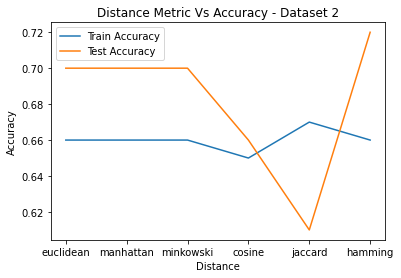

In [13]:
d2_test_acc = []

for distance in distance_metrics:
    accr, precision, recall, f1, roc = Knn(X_train, X_test, y_train, y_test, 7, distance)
    print(f"K = 7, Distance = hamming: Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    d2_test_acc.append(round(accr, 2))
    
print("\nDistance Metric:", distance_metrics)
print("Test Accuracy:", d2_test_acc)

plt.plot(distance_metrics, d2_train_acc, label ='Train Accuracy')
plt.plot(distance_metrics, d2_test_acc, label ='Test Accuracy')

plt.xlabel("Distance")
plt.ylabel("Accuracy")
#plt.xticks(distance_metrics)
plt.legend()
plt.title('Distance Metric Vs Accuracy - Dataset 2')
plt.show()


### Boosting

In [14]:
from random import randint as ri



def predict_boost(X, clfs, alphas, clf):
    if len(clfs) == 0:
        return clf.predict(X)
    pred = []
    for c, alpha in zip(clfs, alphas):
        p = c.predict(X) * alpha
        #print(f"Single pred = {p.shape}")
        pred.append(p)
    pred = np.array(pred)
    # print(f"Pred = {pred[:10]}, shape = {pred.shape}")
    pred = np.sum(pred, axis=0)
    #print(f"Pred = {pred[:10]}, shape = {pred.shape}")
    pred[pred>0.5] = 1
    pred[pred<=0.5] = 0
    #print(f"Pred = {pred[:10]}, shape = {pred.shape}")

    return pred


def boosting(X_train, X_test, y_train, y_test, depth):
    n = len(X_train)
    #print(f"{X_train.shape=},{X_test.shape=}")
    count = 0
    prev_acc = 0
    prev_acc = 0
    
    clfs = []
    alphas = []
    
    ct = 0
    while ct < 10:

        ct+=1
        #print(f"Iteration {ct}")
        clf = DecisionTreeClassifier(max_depth = depth)
        clf = clf.fit(X_train,y_train)
        
        pred = clf.predict(X_train)
        # print(f"pred={pred}")
        # print(f"y_train={y_train}")
        cur_acc = accuracy_score(y_train, pred)
        #print(f"Accuracy = {cur_acc}")

        clfs.append(clf)
        if cur_acc == 1:
            alphas.append(5)
            #print("100% accuracy")
            break
            
        alphas.append(0.5 * np.log((cur_acc)/(1-cur_acc)))

        y_train_temp = pred[pred!=y_train]
        X_train_temp = X_train[pred!=y_train]
        X_train = []
        y_train = []
        for v in range(n):
            rand = ri(0, len(X_train_temp)-1)
            X_train.append(X_train_temp[rand])
            y_train.append(y_train_temp[rand])
        X_train = np.array(X_train)
        y_train = np.array(y_train)

    pred_train = predict_boost(X_train, clfs, alphas, None)
    train_acc = accuracy_score(y_train, pred_train)
    print(f"Train accuracy = {train_acc}")

    pred_test = predict_boost(X_test, clfs, alphas, None)
    test_acc = accuracy_score(y_test, pred_test)
    print(f"Test accuracy = {test_acc}")
    return pred_test
    
def Validation_Knn(X, y, depth):
    
    kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

    ct = 0

    fold_results = []

    for train_index, test_index in kf.split(X, y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        pred_test = boosting(X_train, X_test, y_train, y_test, depth)
        
        accr = accuracy_score(y_test, pred_test)
        precision = precision_score(y_test, pred_test)
        recall = recall_score(y_test, pred_test)
        f1 = f1_score(y_test, pred_test)
        roc = roc_auc_score(y_test, pred_test, average='weighted')
        
        print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")

        fold_results.append([accr, precision, recall, f1, roc])

        ct+=1
    fold_results = np.array(fold_results)
    fold_results = np.sum(fold_results, axis=0)/ct
    return fold_results


### Computing training accuracy for different max depth values - Dataset 2

In [15]:
X, y = get_data(data1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

max_depth = [1,3,5,7,9]
d1_train_acc = []

for depth in max_depth:
    met = Validation_Knn(X_train, y_train, depth)
    print(f"Accuracy = {met[0]:.3f}, precision = {met[1]:.3f}, recall = {met[2]:.3f}, f1 = {met[3]:.3f}, AUC = {met[4]:.3f}")
    d1_train_acc.append(round(met[0], 2))

print("\nMax Depth:", max_depth)
print("Accuracy:", d1_train_acc)



Distribution: Counter({0: 357, 1: 212})
X.shape, y.shape = (569, 30), (569,)
Train accuracy = 1.0
Test accuracy = 0.9347826086956522
Fold: 0. Accuracy = 0.935, precision = 0.941, recall = 0.889, f1 = 0.914, AUC = 0.927
Train accuracy = 1.0
Test accuracy = 0.8913043478260869
Fold: 1. Accuracy = 0.891, precision = 0.882, recall = 0.833, f1 = 0.857, AUC = 0.881
Train accuracy = 1.0
Test accuracy = 0.8913043478260869
Fold: 2. Accuracy = 0.891, precision = 0.882, recall = 0.833, f1 = 0.857, AUC = 0.881
Train accuracy = 1.0
Test accuracy = 0.9347826086956522
Fold: 3. Accuracy = 0.935, precision = 0.938, recall = 0.882, f1 = 0.909, AUC = 0.924
Train accuracy = 1.0
Test accuracy = 0.8913043478260869
Fold: 4. Accuracy = 0.891, precision = 0.929, recall = 0.765, f1 = 0.839, AUC = 0.865
Train accuracy = 1.0
Test accuracy = 0.8666666666666667
Fold: 5. Accuracy = 0.867, precision = 0.867, recall = 0.765, f1 = 0.812, AUC = 0.847
Train accuracy = 1.0
Test accuracy = 0.9555555555555556
Fold: 6. Accura

### Training Vs Testing Accuracies

Train accuracy = 1.0
Test accuracy = 0.8947368421052632
Max Depth = 1: Accuracy = 0.895, precision = 0.909, recall = 0.769, f1 = 0.833, AUC = 0.865
Train accuracy = 1.0
Test accuracy = 0.9122807017543859
Max Depth = 3: Accuracy = 0.912, precision = 0.837, recall = 0.923, f1 = 0.878, AUC = 0.915
Train accuracy = 1.0
Test accuracy = 0.9298245614035088
Max Depth = 5: Accuracy = 0.930, precision = 0.919, recall = 0.872, f1 = 0.895, AUC = 0.916
Train accuracy = 1.0
Test accuracy = 0.9385964912280702
Max Depth = 7: Accuracy = 0.939, precision = 0.944, recall = 0.872, f1 = 0.907, AUC = 0.923
Train accuracy = 1.0
Test accuracy = 0.9385964912280702
Max Depth = 9: Accuracy = 0.939, precision = 0.944, recall = 0.872, f1 = 0.907, AUC = 0.923

Max Depth: [1, 3, 5, 7, 9]
Test Accuracy: [0.89, 0.91, 0.93, 0.94, 0.94]


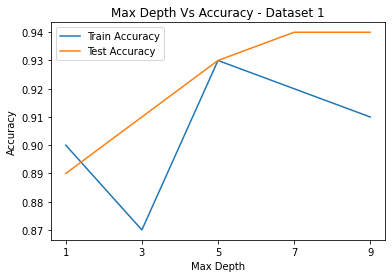

In [16]:
d1_test_acc = []

for depth in max_depth:
    pred_test = boosting(X_train, X_test, y_train, y_test, depth)
    
    accr = accuracy_score(y_test, pred_test)
    precision = precision_score(y_test, pred_test)
    recall = recall_score(y_test, pred_test)
    f1 = f1_score(y_test, pred_test)
    roc = roc_auc_score(y_test, pred_test, average='weighted')
    
    print(f"Max Depth = {depth}: Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    d1_test_acc.append(round(accr, 2))


print("\nMax Depth:", max_depth)
print("Test Accuracy:", d1_test_acc)


plt.plot(max_depth, d1_train_acc, label ='Train Accuracy')
plt.plot(max_depth, d1_test_acc, label ='Test Accuracy')

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(max_depth)
plt.legend()
plt.title('Max Depth Vs Accuracy - Dataset 1')
plt.show()
 

### Computing training accuracy for different max depth values - Dataset 2

In [17]:
X, y = get_data(data2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

d2_train_acc = []

for depth in [1,3,5,7,9]:
    met = Validation_Knn(X_train, y_train, depth)
    print(f"Accuracy = {met[0]:.3f}, precision = {met[1]:.3f}, recall = {met[2]:.3f}, f1 = {met[3]:.3f}, AUC = {met[4]:.3f}")
    d2_train_acc.append(round(met[0], 2))

print("\nMax Depth:", max_depth)
print("Accuracy:", d2_train_acc)


Distribution: Counter({0: 302, 1: 160})
X.shape, y.shape = (462, 9), (462,)
Train accuracy = 1.0
Test accuracy = 0.8108108108108109
Fold: 0. Accuracy = 0.811, precision = 0.778, recall = 0.583, f1 = 0.667, AUC = 0.752
Train accuracy = 1.0
Test accuracy = 0.6756756756756757
Fold: 1. Accuracy = 0.676, precision = 0.500, recall = 0.333, f1 = 0.400, AUC = 0.587
Train accuracy = 1.0
Test accuracy = 0.8648648648648649
Fold: 2. Accuracy = 0.865, precision = 0.818, recall = 0.750, f1 = 0.783, AUC = 0.835
Train accuracy = 1.0
Test accuracy = 0.6756756756756757
Fold: 3. Accuracy = 0.676, precision = 0.500, recall = 0.583, f1 = 0.538, AUC = 0.652
Train accuracy = 1.0
Test accuracy = 0.5945945945945946
Fold: 4. Accuracy = 0.595, precision = 0.421, recall = 0.667, f1 = 0.516, AUC = 0.613
Train accuracy = 1.0
Test accuracy = 0.7837837837837838
Fold: 5. Accuracy = 0.784, precision = 0.667, recall = 0.769, f1 = 0.714, AUC = 0.780
Train accuracy = 1.0
Test accuracy = 0.7297297297297297
Fold: 6. Accurac

### Training Vs Testing Accuracies

Train accuracy = 1.0
Test accuracy = 0.6236559139784946
Max Depth = 3: Accuracy = 0.624, precision = 0.514, recall = 0.500, f1 = 0.507, AUC = 0.601
Train accuracy = 1.0
Test accuracy = 0.3870967741935484
Max Depth = 3: Accuracy = 0.387, precision = 0.387, recall = 1.000, f1 = 0.558, AUC = 0.500
Train accuracy = 1.0
Test accuracy = 0.5806451612903226
Max Depth = 3: Accuracy = 0.581, precision = 0.435, recall = 0.278, f1 = 0.339, AUC = 0.525
Train accuracy = 1.0
Test accuracy = 0.6236559139784946
Max Depth = 3: Accuracy = 0.624, precision = 0.514, recall = 0.500, f1 = 0.507, AUC = 0.601
Train accuracy = 1.0
Test accuracy = 0.5913978494623656
Max Depth = 3: Accuracy = 0.591, precision = 0.458, recall = 0.306, f1 = 0.367, AUC = 0.539

Max Depth: [1, 3, 5, 7, 9]
Test Accuracy: [0.62, 0.39, 0.58, 0.62, 0.59]


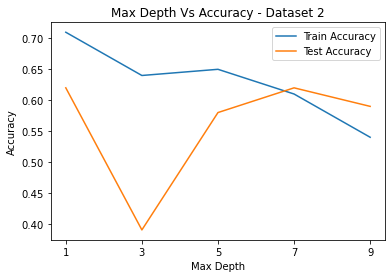

In [18]:
d2_test_acc = []

for depth in max_depth:
    pred_test = boosting(X_train, X_test, y_train, y_test, depth)
    
    accr = accuracy_score(y_test, pred_test)
    precision = precision_score(y_test, pred_test)
    recall = recall_score(y_test, pred_test)
    f1 = f1_score(y_test, pred_test)
    roc = roc_auc_score(y_test, pred_test, average='weighted')
    
    print(f"Max Depth = 3: Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    d2_test_acc.append(round(accr, 2))
    
print("\nMax Depth:", max_depth)
print("Test Accuracy:", d2_test_acc)


plt.plot(max_depth, d2_train_acc, label ='Train Accuracy')
plt.plot(max_depth, d2_test_acc, label ='Test Accuracy')

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(max_depth)
plt.legend()
plt.title('Max Depth Vs Accuracy - Dataset 2')
plt.show()
 
    